In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("COVID-19-time-series-clean-complete.csv")

data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0


In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data["YearMonth"] = data["Date"].map(lambda date: date.year*100 + date.month)

data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0,202108
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0,202108
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0,202108
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0,202108


In [4]:
data_202004 = data.query("YearMonth == 202004").reset_index(drop=True)

data_202004

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
1,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
2,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
3,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
4,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
5785,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
5786,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
5787,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
5788,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [5]:
target_data = data_202004.groupby('Country/Region')['New cases'].sum().reset_index()
target_data

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
...,...,...
188,Vietnam,58
189,West Bank and Gaza,225
190,Yemen,6
191,Zambia,71


In [6]:
target_data = target_data.sort_values("New cases", ascending=False).reset_index(drop=True)
target_data.head(8)

,Country/Region,New cases
0,US,888804
1,France,140313
2,United Kingdom,139956
3,Spain,127546
4,Turkey,106673
5,Russia,104161
6,Italy,99671
7,Germany,91201


In [7]:
data_iran = data[data["Country/Region"] == "Iran"].reset_index(drop=True)
data_iran

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
1,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
2,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
3,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
4,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
558,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,202108
559,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,202108
560,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,202108
561,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,202108


In [8]:
data_iran_202004 = data_iran.query("YearMonth == 202004").reset_index(drop=True)
data_iran_202004['Day'] = data_iran_202004['Date'].map(lambda date: date.day)

data_iran_202004

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth,Day
0,13590,2020-04-01,Iran,47593,3036,15473.0,29084.0,2988,138,817,202004,1
1,13783,2020-04-02,Iran,50468,3160,16711.0,30597.0,2875,124,1238,202004,2
2,13976,2020-04-03,Iran,53183,3294,17935.0,31954.0,2715,134,1224,202004,3
3,14169,2020-04-04,Iran,55743,3452,19736.0,32555.0,2560,158,1801,202004,4
4,14362,2020-04-05,Iran,58226,3603,19736.0,34887.0,2483,151,0,202004,5
5,14555,2020-04-06,Iran,60500,3739,24236.0,32525.0,2274,136,4500,202004,6
6,14748,2020-04-07,Iran,62589,3872,27039.0,31678.0,2089,133,2803,202004,7
7,14941,2020-04-08,Iran,64586,3993,29812.0,30781.0,1997,121,2773,202004,8
8,15134,2020-04-09,Iran,66220,4110,32309.0,29801.0,1634,117,2497,202004,9
9,15327,2020-04-10,Iran,68192,4232,35465.0,28495.0,1972,122,3156,202004,10


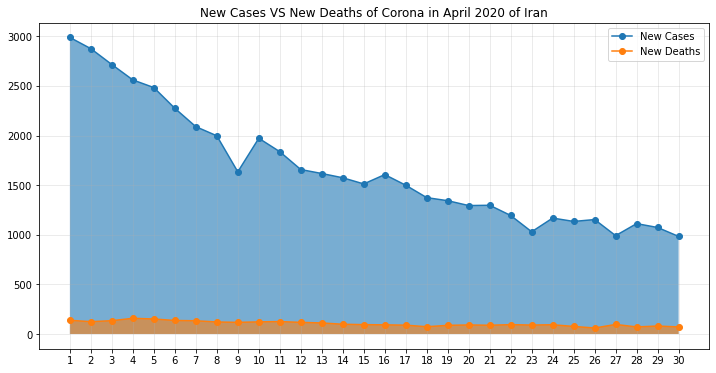

In [9]:
days = data_iran_202004['Day'].to_numpy(dtype=str)
new_cases = data_iran_202004['New cases']
new_deaths = data_iran_202004['New deaths']

plt.figure(figsize=(12, 6))

plt.plot(days, new_cases, marker='o', label='New Cases')
plt.fill_between(days, new_cases, alpha=0.6)

plt.plot(days, new_deaths, marker='o', label='New Deaths')
plt.fill_between(days, new_deaths, alpha=0.6)

plt.title("New Cases VS New Deaths of Corona in April 2020 of Iran:")
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()